In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

In [3]:
data = pd.read_csv("/content/drive/MyDrive/CSE303 project/data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#Display the first and last 15 rows of the dataset
data.head(15)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [6]:
data.tail(15)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
554,924632,B,12.880,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.02343,...,35.74,88.84,595.7,0.12270,0.16200,0.24390,0.06493,0.2372,0.07242,NaN
555,924934,B,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,...,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283,NaN
556,924964,B,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,...,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742,NaN
557,925236,B,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,...,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969,NaN
558,925277,B,14.590,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,NaN
559,925291,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.04105,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,NaN
560,925292,B,14.050,27.15,91.38,600.4,0.09929,0.11260,0.044620,0.04304,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,NaN
561,925311,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.000000,0.00000,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,NaN
562,925622,M,15.220,30.62,103.40,716.9,0.10480,0.20870,0.255000,0.09429,...,42.79,128.70,915.0,0.14170,0.79170,1.17000,0.23560,0.4089,0.14090,NaN
563,926125,M,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.317400,0.14740,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,NaN


In [7]:
#Check for any missing (null) values in the dataset
data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [8]:
if 'Unnamed: 32' in data.columns:
    data = data.drop('Unnamed: 32', axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
duplicate = data[data.duplicated()]
duplicate

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [11]:
# Check for duplicate values
data.duplicated().sum()

np.int64(0)

In [12]:
data_copy = data.copy()

In [13]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [14]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [15]:
# Define the mapping dictionary
diagnosis_mapping = {
    'M': 1,
    'B': 0,
}

# Apply the mapping
data['diagnosis'] = data['diagnosis'].map(diagnosis_mapping)

In [16]:
#Display the Correlation Matrix
correlation=data.corr()
correlation

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


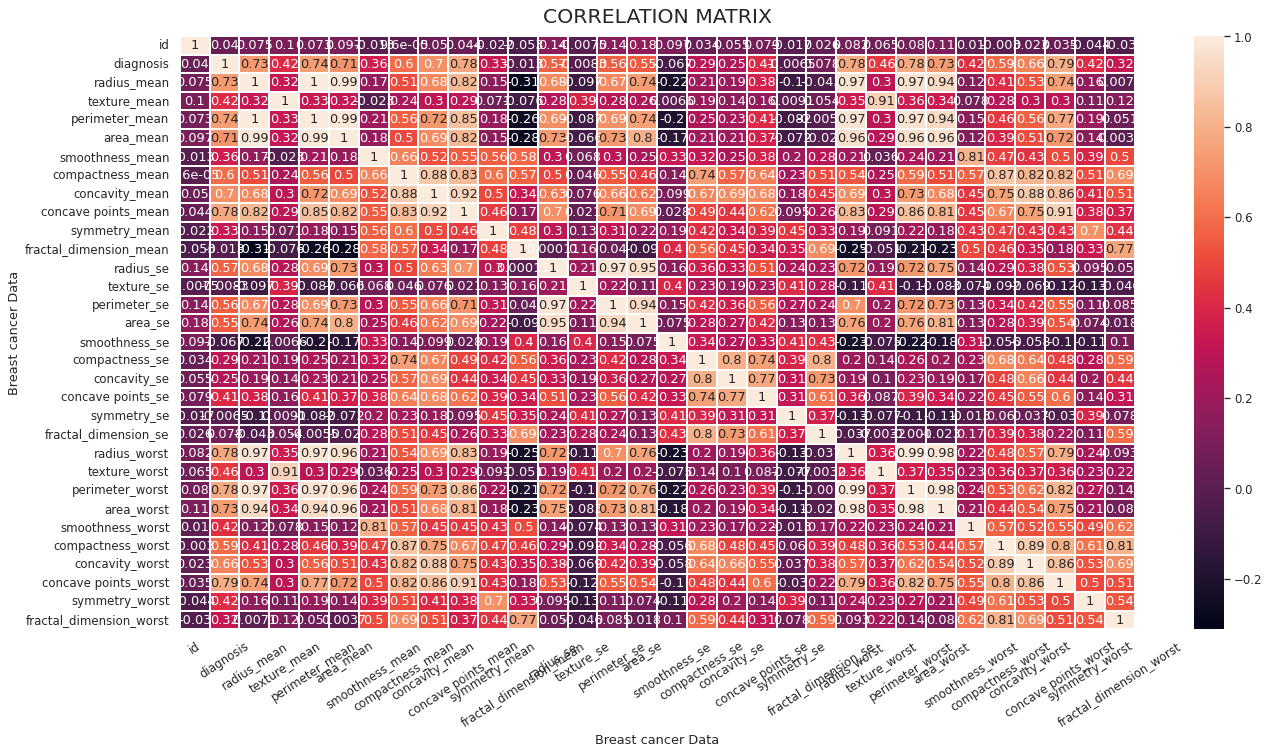

In [17]:
# Visualisation of the corralation table

plt.figure(figsize=(20,10), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Breast cancer Data')
plt.ylabel('Breast cancer Data')
plt.xticks(rotation=33)
plt.show()

<Figure size 6000x3000 with 0 Axes>

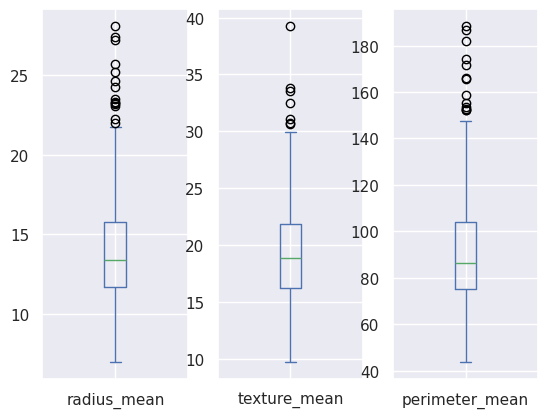

In [18]:
#Boxplot for multiple features
import matplotlib.pyplot as plt
features_to_plot = ['radius_mean', 'texture_mean', 'perimeter_mean']
plt.figure(figsize=(60, 30))
data[features_to_plot].plot(kind='box', subplots=True, layout=(1,3), sharex=False, sharey=False)
plt.show()


There are three separate box plots, one for each of the selected features: 'radius_mean', 'texture_mean', and 'perimeter_mean'.  By examining each box plot, you can understand the distribution of each feature:

* **Center:** The median line indicates the central tendency of the feature's values.
* **Spread:** The IQR (box height) and the whiskers indicate the variability or spread of the data. A larger IQR suggests more variability.
* **Symmetry:**  If the median is roughly centered within the box, and the whiskers are of similar length, the distribution might be considered relatively symmetric. Skewness (a longer whisker on one side) could indicate a non-symmetric distribution.
* **Outliers:** The presence of outliers suggests data points that differ significantly from the bulk of the data. These could be errors in measurement or truly exceptional values.

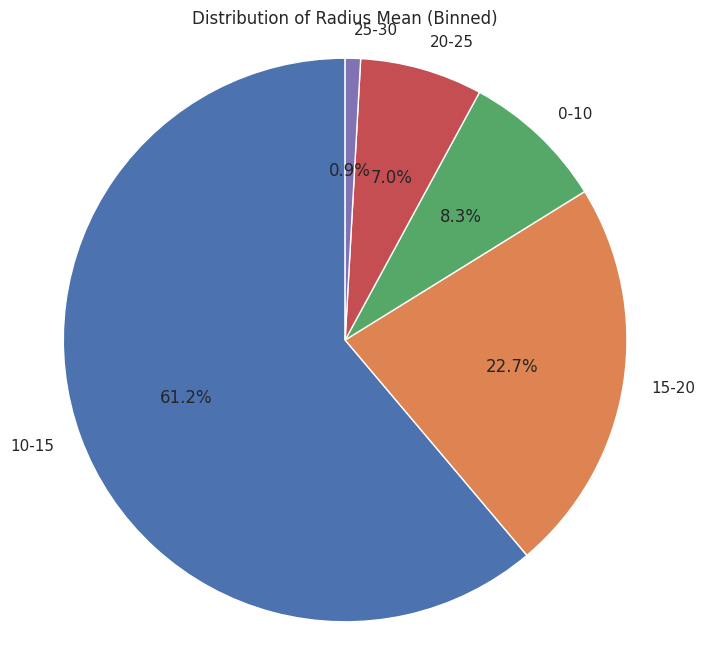

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
# Bin the data
bins = [0, 10, 15, 20, 25, 30]
labels = ['0-10', '10-15', '15-20', '20-25', '25-30']
data['radius_binned'] = pd.cut(data['radius_mean'], bins=bins, labels=labels, right=False)

# Count occurrences in each bin
radius_counts = data['radius_binned'].value_counts()

# Pie chart of Radius Mean
plt.figure(figsize=(8, 8))
plt.pie(radius_counts, labels=radius_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Radius Mean (Binned)')
plt.axis('equal')
plt.show()


**This pie chart represents the distribution of the "radius_mean" values grouped into specified ranges, with labels indicating the intervals. The largest portion (over 60%) falls within the 10-15 range, highlighting that most measurements are in this interval. Other segments show smaller proportions, with very few values in the 25-30 range.**

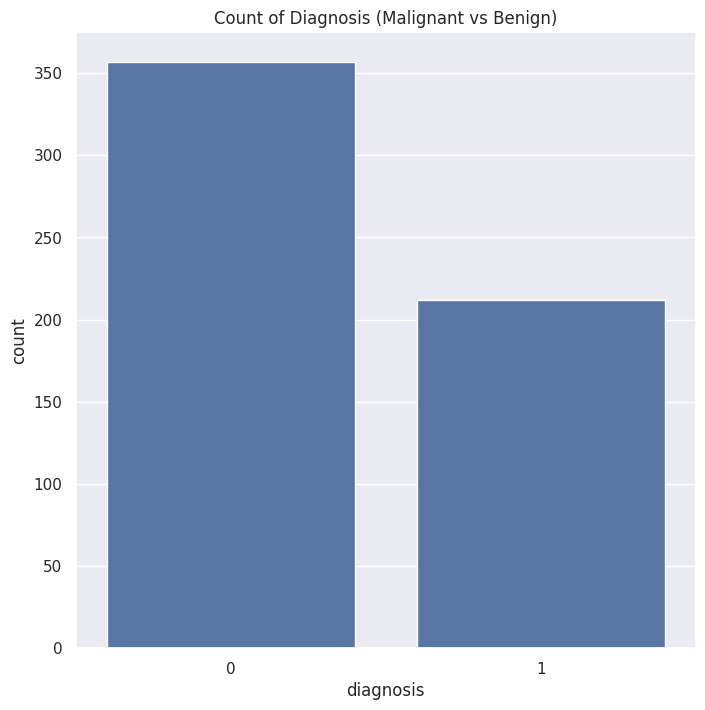

In [20]:
  # Count plot of Diagnosis (Malignant vs Benign)
  import pandas as pd
  import matplotlib.pyplot as plt
  plt.figure(figsize=(8, 8))
  sns.countplot(x='diagnosis', data=data)
  plt.title("Count of Diagnosis (Malignant vs Benign)")
  plt.show()

**This plot is a bar chart showing the count of diagnoses categorized as either malignant ("M") or benign ("B"). The y-axis represents the number of cases for each category, with malignant diagnoses being around 210 and benign diagnoses around 360. The title indicates that the chart compares the counts of these two diagnosis types.**

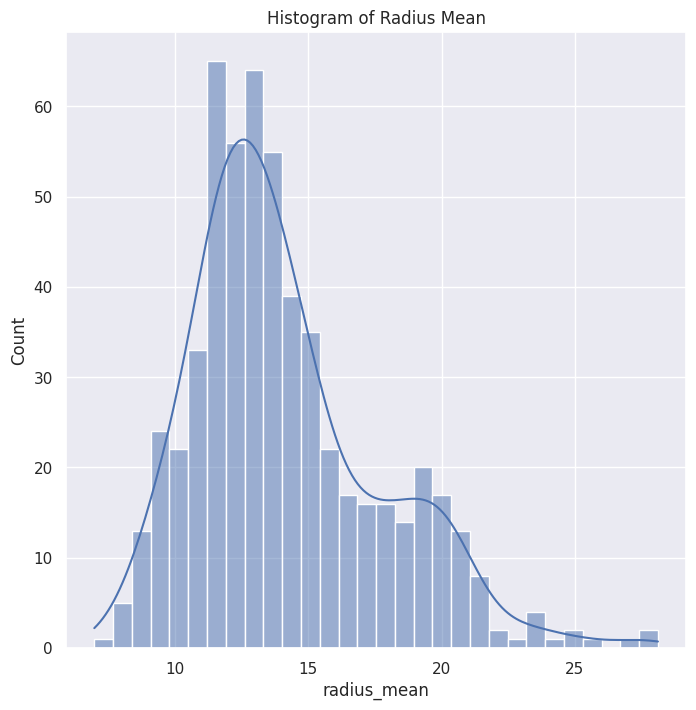

In [21]:
# Histogram of Radius Mean
plt.figure(figsize=(8, 8))
sns.histplot(data['radius_mean'], kde=True, bins=30)
plt.title("Histogram of Radius Mean")
plt.show()


**This plot shows a histogram of the "radius_mean" data, with the count of observations on the y-axis and the radius_mean values on the x-axis. The histogram bars are semi-transparent and in blue. Additionally, there is a smooth density curve overlaid on the histogram, which models the distribution of the data. The distribution appears to be roughly bell-shaped but slightly skewed to the right.**

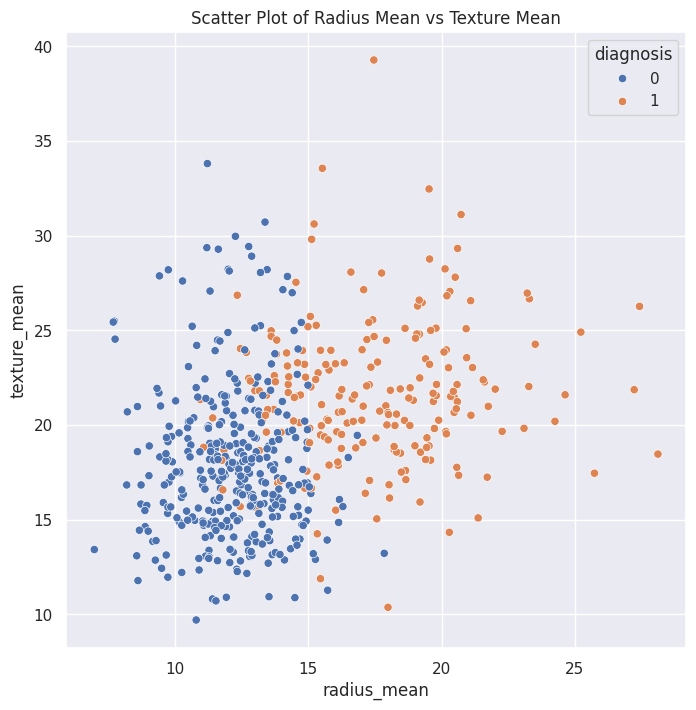

In [22]:
# scatter plot of Radius Mean vs Texture Mean
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=data)
plt.title("Scatter Plot of Radius Mean vs Texture Mean")
plt.show()

**This scatter plot displays the relationship between two variables: the radius_mean (x-axis) and the texture_mean (y-axis), with data points color-coded by diagnosis: malignant (blue) and benign (orange). The plot shows a spread of points with some overlap, indicating variation within each diagnosis group, and suggests some patterns or differences in the distribution of these features between malignant and benign cases.**

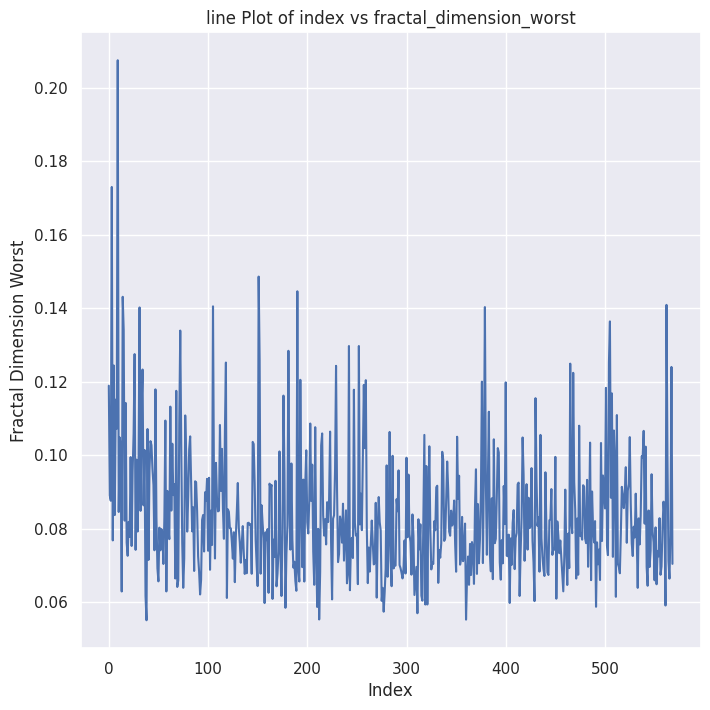

In [23]:
plt.figure(figsize=(8, 8))
sns.lineplot(x=data.index,y='fractal_dimension_worst', data=data)
plt.xlabel('Index')
plt.ylabel('Fractal Dimension Worst')
plt.title("line Plot of index vs fractal_dimension_worst")
plt.show()

**This line plot displays the variation of the "fractal_dimension_worst" feature across a sequence of index values. The y-axis shows the "fractal_dimension_worst" measurements, which fluctuate within a relatively small range, while the x-axis represents the index or position within the dataset. The plot indicates that the fractal dimension values exhibit frequent short-term fluctuations but tend to hover around a lower range without any clear trend over the index.**

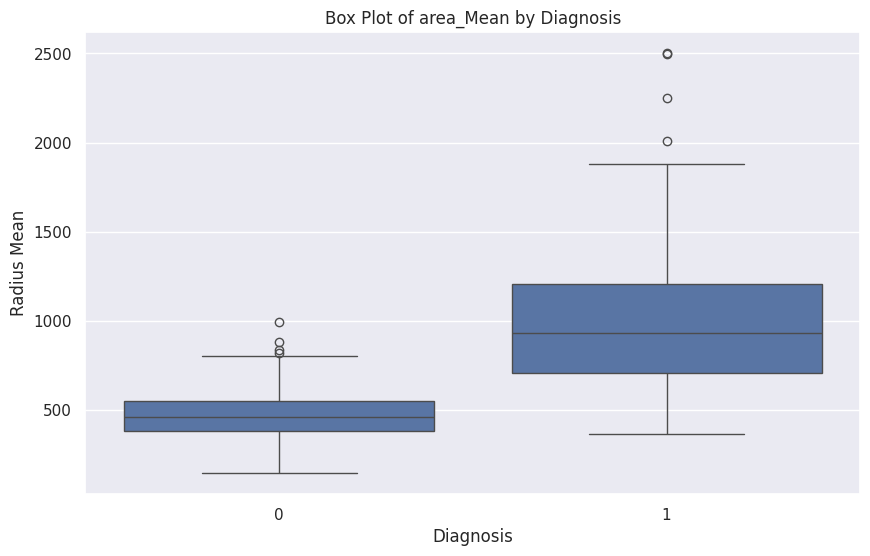

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='diagnosis', y='area_mean', data=data)
plt.title('Box Plot of area_Mean by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')
plt.show()

**This box plot compares the distribution of the "radius_mean" feature between two diagnosis groups: malignant ("M") and benign ("B"). The plot shows that the median "radius_mean" is higher in the malignant group, with a wider spread and some outliers, especially in the benign group. Overall, it visually suggests that "radius_mean" tends to be larger in malignant cases.**

<Figure size 6000x3000 with 0 Axes>

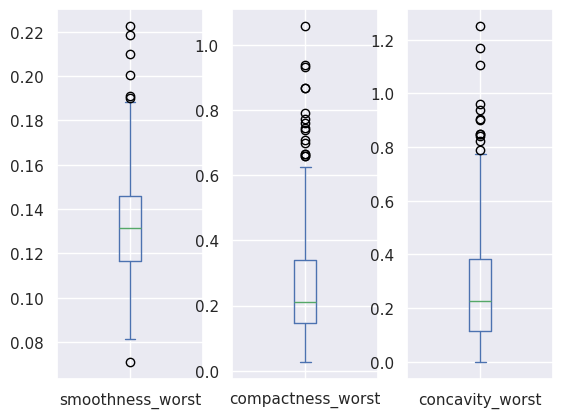

In [25]:
features_to_plot = ['smoothness_worst', 'compactness_worst', 'concavity_worst']
plt.figure(figsize=(60, 30))
data[features_to_plot].plot(kind='box', subplots=True, layout=(1,3), sharex=False, sharey=False)
plt.show()

There are three separate box plots, one for each of the selected features: 'Smoothness Wors', 'Compactness Worst', and 'Concavity Worst'. By examining each box plot, you can understand the distribution of each feature:
1. Smoothness Worst

Center: The median line suggests that the typical smoothness_worst value is around 0.15.

Spread: The interquartile range (IQR) is moderate, indicating some variability in smoothness_worst across the data.

Symmetry: The median appears slightly closer to the bottom of the box, suggesting a slight skewness toward higher values.

Outliers: There are a few outliers above the upper whisker, indicating some unusually high smoothness_worst values.
2. Compactness Worst

Center: The median is around 0.16, illustrating the typical compactness_worst.

Spread: The IQR is fairly narrow, indicating less variability compared to smoothness_worst.

Symmetry: The median appears roughly centered, implying a relatively symmetric distribution.

Outliers: Several outliers are present above the upper whisker, suggesting some exceptional high values.
3. Concavity Worst

Center: The median is near 0.12, representing the central tendency.

Spread: The IQR is quite tight, indicating the data points are closely clustered.

Symmetry: The median is fairly central within the box, with similar whisker lengths on both sides, indicating approximate symmetry.

Outliers: A few outliers exist above the upper whisker, denoting some high extreme values.

<Figure size 6000x3000 with 0 Axes>

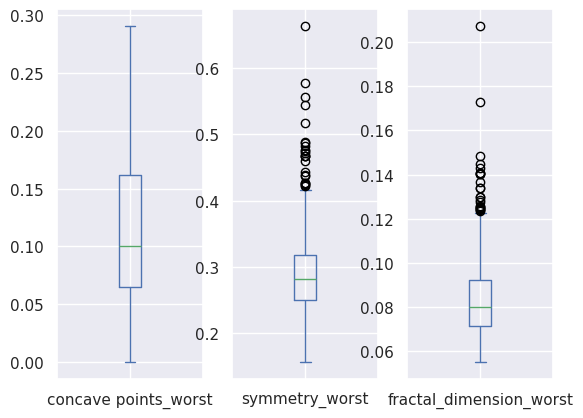

In [26]:
features_to_plot = ['concave points_worst' ,'symmetry_worst' ,'fractal_dimension_worst']
plt.figure(figsize=(60, 30))
data[features_to_plot].plot(kind='box', subplots=True, layout=(1,3), sharex=False, sharey=False)
plt.show()

There are three separate box plots, one for each of the selected features: 'Concave Points Worst', 'Symmetry Worst
', and 'Fractal Dimension Worst'. By examining each box plot, you can understand the distribution of each feature:
1. Concave Points Worst

Center: The median is around 0.05, indicating most data points are relatively low.

Spread: The IQR is small, denoting limited variability.
Symmetry: The median is near the center of the box, suggesting a symmetric distribution.

Outliers: There are a few outliers above the upper whisker, representing atypically high concave points.
2. Symmetry Worst

Center: The median is close to 0.14, reflecting typical symmetry_worst.

Spread: The IQR indicates moderate variability.
Symmetry: The median is roughly centered, which suggests the distribution is relatively symmetric.

Outliers: Some outliers at higher values, indicating occasional extreme cases.
3. Fractal Dimension Worst

Center: The median appears around 0.09.

Spread: IQR shows some variability but generally tight.
Symmetry: Median near the middle of the box suggests approximate symmetry.

Outliers: A few high outliers are present, indicating some data points with unusually high fractal dimension values.

# **Machine Learing Models : Logistic Regression**

In [27]:
data = pd.read_csv("/content/drive/MyDrive/CSE303 project/data.csv")

In [28]:
if 'Unnamed: 32' in data.columns:
    data = data.drop('Unnamed: 32', axis=1)

In [29]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [30]:
data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


In [31]:
# Define the mapping dictionary
diagnosis_mapping = {
    'M': 1,
    'B': 0,
}

# Apply the mapping
data['diagnosis'] = data['diagnosis'].map(diagnosis_mapping)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
print(X_train)


           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
68     859471        9.029         17.33           58.79      250.5   
181    873593       21.090         26.57          142.70     1311.0   
63     859196        9.173         13.86           59.20      260.9   
248  88466802       10.650         25.22           68.01      347.0   
60     858970       10.170         14.88           64.55      311.9   
..        ...          ...           ...             ...        ...   
71     859711        8.888         14.64           58.79      244.0   
106    863031       11.640         18.33           75.17      412.5   
270   8910721       14.290         16.82           90.30      632.6   
435    908489       13.980         19.62           91.12      599.5   
102    862965       12.180         20.52           77.22      458.7   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
68           0.10660           0.14130         0.31300              

In [36]:
print(y_train)


68     0
181    1
63     0
248    0
60     0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 455, dtype: int64


In [37]:
print(X_test)


           id  radius_mean  texture_mean  perimeter_mean  area_mean  \
204     87930        12.47         18.60           81.09      481.9   
70     859575        18.94         21.31          123.60     1130.0   
131      8670        15.46         19.48          101.70      748.9   
431    907915        12.40         17.68           81.47      467.8   
540    921385        11.54         14.44           74.65      402.9   
..        ...          ...           ...             ...        ...   
486    913102        14.64         16.85           94.21      666.0   
75    8610404        16.07         19.65          104.10      817.7   
249    884689        11.52         14.93           73.87      406.3   
238    883270        14.22         27.85           92.55      623.9   
265  88995002        20.73         31.12          135.70     1419.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
204          0.09965           0.10580         0.08005              

In [38]:
print(y_test)

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64


In [39]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [40]:
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

Accuracy: 0.956140350877193
Precision: 0.975
Recall (Sensitivity): 0.9069767441860465
F1-Score: 0.9397590361445783


In [42]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



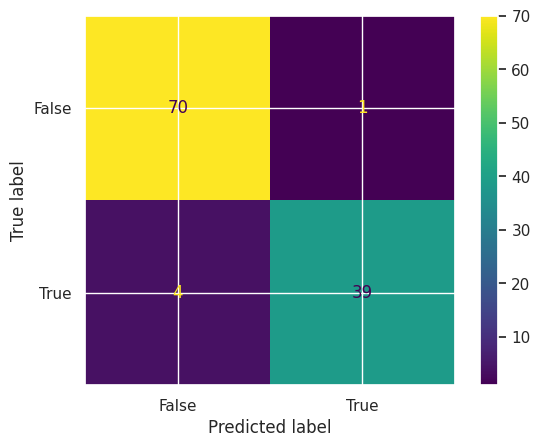

In [43]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()